In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
tr_df = pd.read_csv('Train.csv')

In [3]:
tr_df.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [4]:
tr_df.shape

(3132, 9)

In [5]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3132 non-null   object 
 1   B       3132 non-null   float64
 2   C       3132 non-null   float64
 3   D       3132 non-null   float64
 4   E       3132 non-null   float64
 5   F       3132 non-null   float64
 6   G       3132 non-null   float64
 7   H       3132 non-null   float64
 8   Target  3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [6]:
tr_df['A'].unique()

array(['F', 'M', 'I'], dtype=object)

In [7]:
numeric = tr_df.select_dtypes([float, int])
target = tr_df['Target']
numeric.head()

,B,C,D,E,F,G,H,Target
0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


<Axes: >

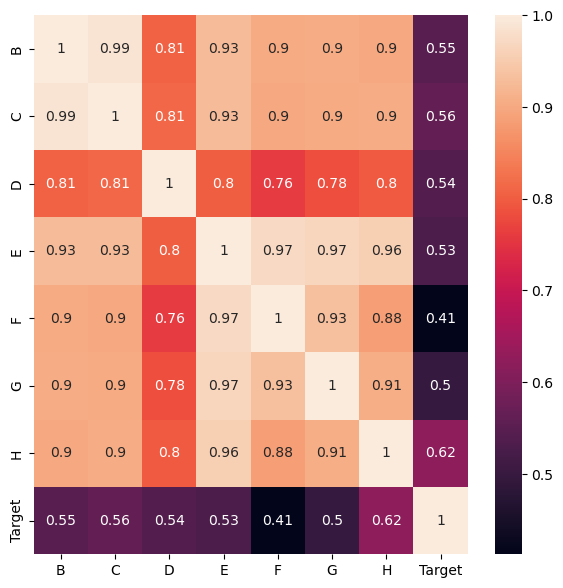

In [8]:
plt.figure(figsize=(7,7))
sns.heatmap(numeric.corr(),annot=True)

In [9]:
X=tr_df[['H','C','B','E','G','F']]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

  feature         VIF
0       H   88.063143
1       C  778.272517
2       B  725.316068
3       E  471.393004
4       G   65.025381
5       F  112.876186


In [10]:
tr_df.rename(columns={'F': 'Fval'}, inplace=True)
final_df = pd.concat([tr_df, pd.get_dummies(tr_df['A']).astype(int)], axis=1)
final_df.drop(['I', 'A'], axis=1, inplace=True)
# print(pd.DataFrame.rename.__doc__)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('Target', axis=1), target, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse, model.score(X_test,y_test))

5.033214587255534 0.5520703456030804


In [13]:
test_df = pd.read_csv('Test.csv')
test_df

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215
...,...,...,...,...,...,...,...,...,...
1040,532,I,0.470,0.370,0.120,0.4705,0.1845,0.1055,0.155
1041,3417,M,0.580,0.460,0.150,1.0165,0.4910,0.2210,0.265
1042,1505,M,0.635,0.510,0.185,1.3080,0.5440,0.3180,0.377
1043,2245,M,0.460,0.375,0.140,0.5105,0.1920,0.1045,0.205


In [14]:
test_df.rename(columns={'F': 'Fval'}, inplace=True)
fn_test_df = pd.concat([test_df, pd.get_dummies(test_df['A']).astype(int)], axis=1)
fn_test_df.drop(['I', 'A'], axis=1, inplace=True)
Index=test_df['Index']
test_df.drop(['Index'],axis=1,inplace=True)

In [15]:
y_final = model.predict(fn_test_df.drop(columns = ['Index']))

In [16]:
result_final = pd.DataFrame(Index, columns = ['Index'])
result_final['Target']= y_final

In [18]:
result_final

,Index,Target
0,866,11.818252
1,1483,10.215550
2,599,13.946495
3,1702,12.059631
4,670,11.101059
...,...,...
1040,532,9.149189
1041,3417,9.704472
1042,1505,12.262542
1043,2245,10.911624


In [19]:
result_final.to_csv("subm.csv", index=False)